# Exploring Jane Addams Letters 1901-1927 [Modularity]

### MATH-390 | 01 | ADV TOPICS: NETWORK SCIENCE | Professor Beecher

### Tina Nosrati
### last update: 12/01/2024


In [32]:
#packages
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors
from community import community_louvain
from itertools import cycle
import seaborn as sns
from collections import Counter
#get partisions from the modularity and compare the observations
#in them eith the tags they have.

#topic modeling

#word cloud

In [33]:
nodes=pd.read_csv('cleaned_data.csv')

In [34]:
len(nodes)

1316

In [57]:

def visualize_clustered_network(adj_df, nodes_df):
    """
    Visualizes a network with nodes color-coded by their community.

    Parameters:
        adj_df (pd.DataFrame): Edge list with 'Letter_A', 'Letter_B', and optional 'Similarity'.
        nodes_df (pd.DataFrame): Node attributes with 'Identifier' and any additional columns.

    Returns:
        None
    """
    # Create the graph from the adjacency matrix dataframe
    G = nx.from_pandas_edgelist(adj_df, source='Letter_A', target='Letter_B', edge_attr='Similarity')

    # Perform community detection
    partition = community_louvain.best_partition(G)

    # Assign distinct colors to each community
    unique_communities = list(set(partition.values()))
    palette = sns.color_palette('tab20', len(unique_communities))  # Use a diverse color palette
    community_color_map = {community: palette[i % len(palette)] for i, community in enumerate(unique_communities)}

    # Extract node colors based on their community
    node_colors = [community_color_map[partition[node]] for node in G.nodes]

    # Use spring layout to minimize node overlap
    pos = nx.spring_layout(G, seed=42, k=0.5 / (len(G.nodes) ** 0.5))

    # Draw the graph
    plt.figure(figsize=(12, 10))
    nx.draw_networkx(
        G, pos, with_labels=True, node_color=node_colors,
        edge_color='gray', font_size=10, node_size=800, alpha=0.9
    )

    # Remove legend and show the plot
    plt.title("Network Visualization with Community Clustering")
    plt.show()

In [62]:
def compute_tag_consistency(edge_df, node_df):
    # Create a weighted graph
    G = nx.from_pandas_edgelist(edge_df, 'Letter_A', 'Letter_B', edge_attr='Similarity', create_using=nx.Graph())

    # Add node tags as attributes
    nx.set_node_attributes(G, node_df.set_index('Identifier')['tags'].to_dict(), 'tags')

    # Detect communities
    partition = community_louvain.best_partition(G, weight='Similarity')

    # Group nodes by community
    community_nodes = {}
    for node, community in partition.items():
        community_nodes.setdefault(community, []).append(node)

    # Calculate Tag Consistency Score (TCS)
    community_consistency = {}
    for community, nodes in community_nodes.items():
        tags = [G.nodes[node].get('tags') for node in nodes if G.nodes[node].get('tags') is not None]
        if tags:
            most_common_tag, most_common_count = Counter(tags).most_common(1)[0]
            tcs = most_common_count / len(nodes)
        else:
            most_common_tag, tcs = None, 0

        community_consistency[community] = {'TCS': tcs, 'Most Common Tag': most_common_tag}

    return community_consistency


# Network Analysis Complete 

In [36]:
df_all=pd.read_csv("similarity_df_complete.csv")

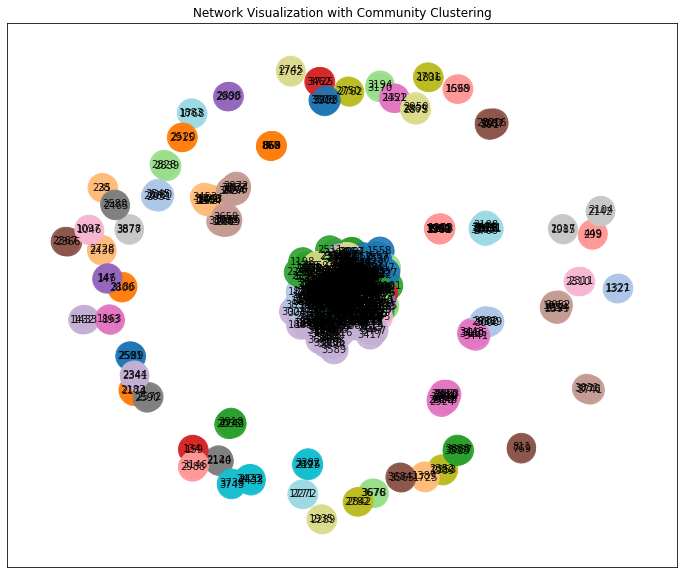

{0: {'TCS': 0.010638297872340425, 'Most Common Tag': 'Family;Health'},
 16: {'TCS': 0.0196078431372549, 'Most Common Tag': 'Family;Visits'},
 1: {'TCS': 0.03773584905660377, 'Most Common Tag': 'Family'},
 3: {'TCS': 0, 'Most Common Tag': None},
 4: {'TCS': 0, 'Most Common Tag': None},
 62: {'TCS': 0.023809523809523808, 'Most Common Tag': 'Family'},
 49: {'TCS': 0.03278688524590164, 'Most Common Tag': 'Lectures;Requests'},
 7: {'TCS': 0.07692307692307693, 'Most Common Tag': 'Family'},
 8: {'TCS': 0, 'Most Common Tag': None},
 9: {'TCS': 0.03225806451612903, 'Most Common Tag': 'Lectures'},
 10: {'TCS': 0, 'Most Common Tag': None},
 11: {'TCS': 0.03333333333333333, 'Most Common Tag': 'Thanks'},
 12: {'TCS': 0, 'Most Common Tag': None},
 14: {'TCS': 0.16666666666666666, 'Most Common Tag': 'Health;Travels'},
 15: {'TCS': 0.2222222222222222, 'Most Common Tag': 'Books;Thanks'},
 17: {'TCS': 0, 'Most Common Tag': None},
 18: {'TCS': 0.045454545454545456,
  'Most Common Tag': 'Hull-House Visits

In [64]:
community_consistency=compute_tag_consistency(df_all, nodes)
visualize_clustered_network(df_all, nodes)
community_consistency

# Network Analysis 1901-1909 

In [60]:
df_1901_1909=pd.read_csv("similarity_df_1901_1909.csv")

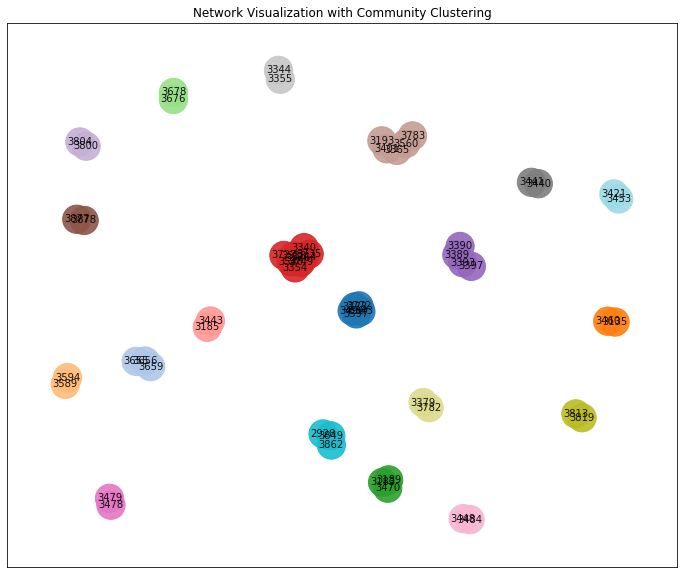

{0: {'TCS': 0, 'Most Common Tag': None},
 1: {'TCS': 0.3333333333333333, 'Most Common Tag': 'Health;Travels'},
 2: {'TCS': 0, 'Most Common Tag': None},
 3: {'TCS': 0, 'Most Common Tag': None},
 4: {'TCS': 0, 'Most Common Tag': None},
 5: {'TCS': 0, 'Most Common Tag': None},
 6: {'TCS': 0, 'Most Common Tag': None},
 7: {'TCS': 0, 'Most Common Tag': None},
 8: {'TCS': 0, 'Most Common Tag': None},
 12: {'TCS': 0, 'Most Common Tag': None},
 10: {'TCS': 0, 'Most Common Tag': None},
 11: {'TCS': 0, 'Most Common Tag': None},
 13: {'TCS': 0, 'Most Common Tag': None},
 14: {'TCS': 0, 'Most Common Tag': None},
 15: {'TCS': 0, 'Most Common Tag': None},
 16: {'TCS': 0, 'Most Common Tag': None},
 17: {'TCS': 0, 'Most Common Tag': None},
 18: {'TCS': 0, 'Most Common Tag': None},
 19: {'TCS': 0, 'Most Common Tag': None},
 9: {'TCS': 0, 'Most Common Tag': None}}

In [66]:
community_consistency=compute_tag_consistency(df_1901_1909, nodes)
visualize_clustered_network(df_1901_1909, nodes)
community_consistency

# Network Analysis 1910-1919

In [68]:
df_1910_1919=pd.read_csv("similarity_df_1910_1919.csv")

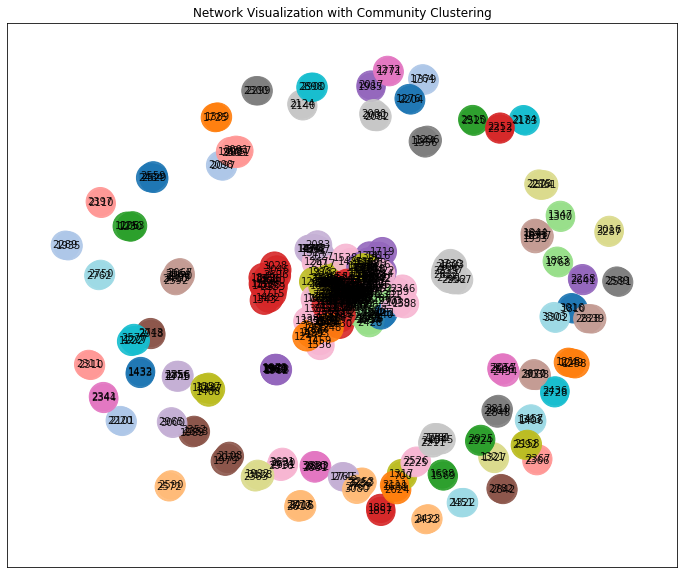

{9: {'TCS': 0, 'Most Common Tag': None},
 1: {'TCS': 0.5, 'Most Common Tag': 'Hull-House'},
 2: {'TCS': 0.05, 'Most Common Tag': 'Family;Travels'},
 3: {'TCS': 0, 'Most Common Tag': None},
 4: {'TCS': 0, 'Most Common Tag': None},
 5: {'TCS': 0.023809523809523808, 'Most Common Tag': 'Friends'},
 6: {'TCS': 0, 'Most Common Tag': None},
 7: {'TCS': 0, 'Most Common Tag': None},
 8: {'TCS': 0, 'Most Common Tag': None},
 22: {'TCS': 0.04, 'Most Common Tag': 'Lectures;Requests'},
 11: {'TCS': 0, 'Most Common Tag': None},
 12: {'TCS': 0, 'Most Common Tag': None},
 13: {'TCS': 0.25, 'Most Common Tag': 'Books;Thanks'},
 14: {'TCS': 0, 'Most Common Tag': None},
 15: {'TCS': 0, 'Most Common Tag': None},
 16: {'TCS': 0, 'Most Common Tag': None},
 17: {'TCS': 0.027777777777777776, 'Most Common Tag': 'Lectures'},
 18: {'TCS': 0, 'Most Common Tag': None},
 19: {'TCS': 0.5, 'Most Common Tag': 'Family;Health'},
 20: {'TCS': 0.3333333333333333, 'Most Common Tag': 'Family;Travels'},
 21: {'TCS': 0.0384615

In [69]:
community_consistency=compute_tag_consistency(df_1910_1919, nodes)
visualize_clustered_network(df_1910_1919, nodes)
community_consistency

# Network Analysis 1920-1927

In [71]:
df_1920_1927=pd.read_csv("similarity_df_1920_1927.csv")

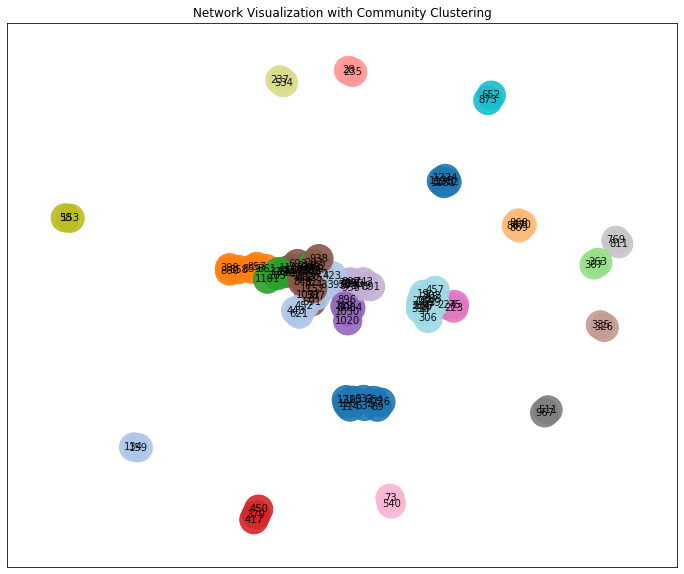

{0: {'TCS': 0, 'Most Common Tag': None},
 1: {'TCS': 0, 'Most Common Tag': None},
 3: {'TCS': 0, 'Most Common Tag': None},
 4: {'TCS': 0, 'Most Common Tag': None},
 9: {'TCS': 0.047619047619047616, 'Most Common Tag': 'Thanks'},
 6: {'TCS': 0, 'Most Common Tag': None},
 7: {'TCS': 0, 'Most Common Tag': None},
 17: {'TCS': 0, 'Most Common Tag': None},
 11: {'TCS': 0, 'Most Common Tag': None},
 8: {'TCS': 0.1111111111111111,
  'Most Common Tag': 'Hull-House Visits;Requests'},
 14: {'TCS': 0, 'Most Common Tag': None},
 15: {'TCS': 0, 'Most Common Tag': None},
 16: {'TCS': 0.07142857142857142, 'Most Common Tag': 'Requests'},
 18: {'TCS': 0, 'Most Common Tag': None},
 19: {'TCS': 0, 'Most Common Tag': None},
 20: {'TCS': 0.5, 'Most Common Tag': 'Lectures'},
 21: {'TCS': 0, 'Most Common Tag': None},
 2: {'TCS': 0, 'Most Common Tag': None},
 5: {'TCS': 0, 'Most Common Tag': None},
 10: {'TCS': 0.5, 'Most Common Tag': 'Family'},
 12: {'TCS': 0, 'Most Common Tag': None},
 13: {'TCS': 0, 'Most Co

In [72]:
community_consistency=compute_tag_consistency(df_1920_1927, nodes)
visualize_clustered_network(df_1920_1927, nodes)
community_consistency